# IMPORTING LIBRARIES

In [1]:
import sys
sys.path.append("../")
from helper_functions import *

c:\Users\Prash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from scipy import sparse

# DATA PREPARATION

## Importing Data

In [3]:
x_train = sparse.load_npz("Data/xtrain.npz")
y_test = np.load("Data/ytest.npy", allow_pickle=True)
x_test = sparse.load_npz("Data/xtest.npz")
y_train = np.load("Data/ytrain.npy", allow_pickle=True)

## Putting Data Together

In [4]:
x = sparse.vstack([x_train, x_test])
y = np.concatenate([y_train, y_test], axis=0)

## Class Weighting

In [5]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weights = {index:value for index,value in enumerate(weights)}
weights

{0: 0.6519291273389634,
 1: 1.3608710680954026,
 2: 1.2602432778489117,
 3: 2.074835309617918,
 4: 0.6133831892186647,
 5: 1.5328012458633444,
 6: 2.309090909090909,
 7: 0.7755343248300994,
 8: 1.1202162469768104,
 9: 0.741012610577828,
 10: 0.8275354703100368}

# MODELLING

## Initial Modelling

In [6]:
initial_models = Train_Classifiers(x=x, y=y)

In [8]:
initial_models.fit()

Training Logistic Regression
Logistic Regression Model Trained
------------------
Training Decision Tree
Decision Tree Model Trained
------------------
Training KNN
KNN Model Trained
------------------
Training Multinomial Naive Bayes
Multinomial Naive Bayes Model Trained
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
------------------
Training SVC
SVC Model Trained
------------------
Training AdaBoost
AdaBoost Model Trained
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
------------------
Training Random Forest
Random Forest Model Trained
------------------
Training XGBoost
XGBoost Model Trained
------------------
Training CatBoost
Learning rate set to 0.086913
0:	learn: 2.3255540	total: 4.71s	remaining: 1h 18m 22s
1:	learn: 2.2758785	total: 9.18s	remaining: 1h 16m 23s
2:	learn: 2.2280824	total: 13.7s	remaining: 1h 15m 38s
3:	learn: 2.1900989	total: 18.2s	remaining: 1h 15m 21s
4:	learn: 2.1552945	total: 22.7s	remaini

In [9]:
initial_models.score()

Logistic Regression: 0.64
Decision Tree: 0.34793650793650793
KNN: 0.5161904761904762
Multinomial Naive Bayes: 0.4076190476190476
Gaussian Naive Bayes: 0.4050793650793651
SVC: 0.6215873015873016
AdaBoost: 0.4184126984126984
Gradient Boosting: 0.5758730158730159
Random Forest: 0.5479365079365079
XGBoost: 0.5784126984126984
CatBoost: 0.6177777777777778
LightGBM: 0.6101587301587301


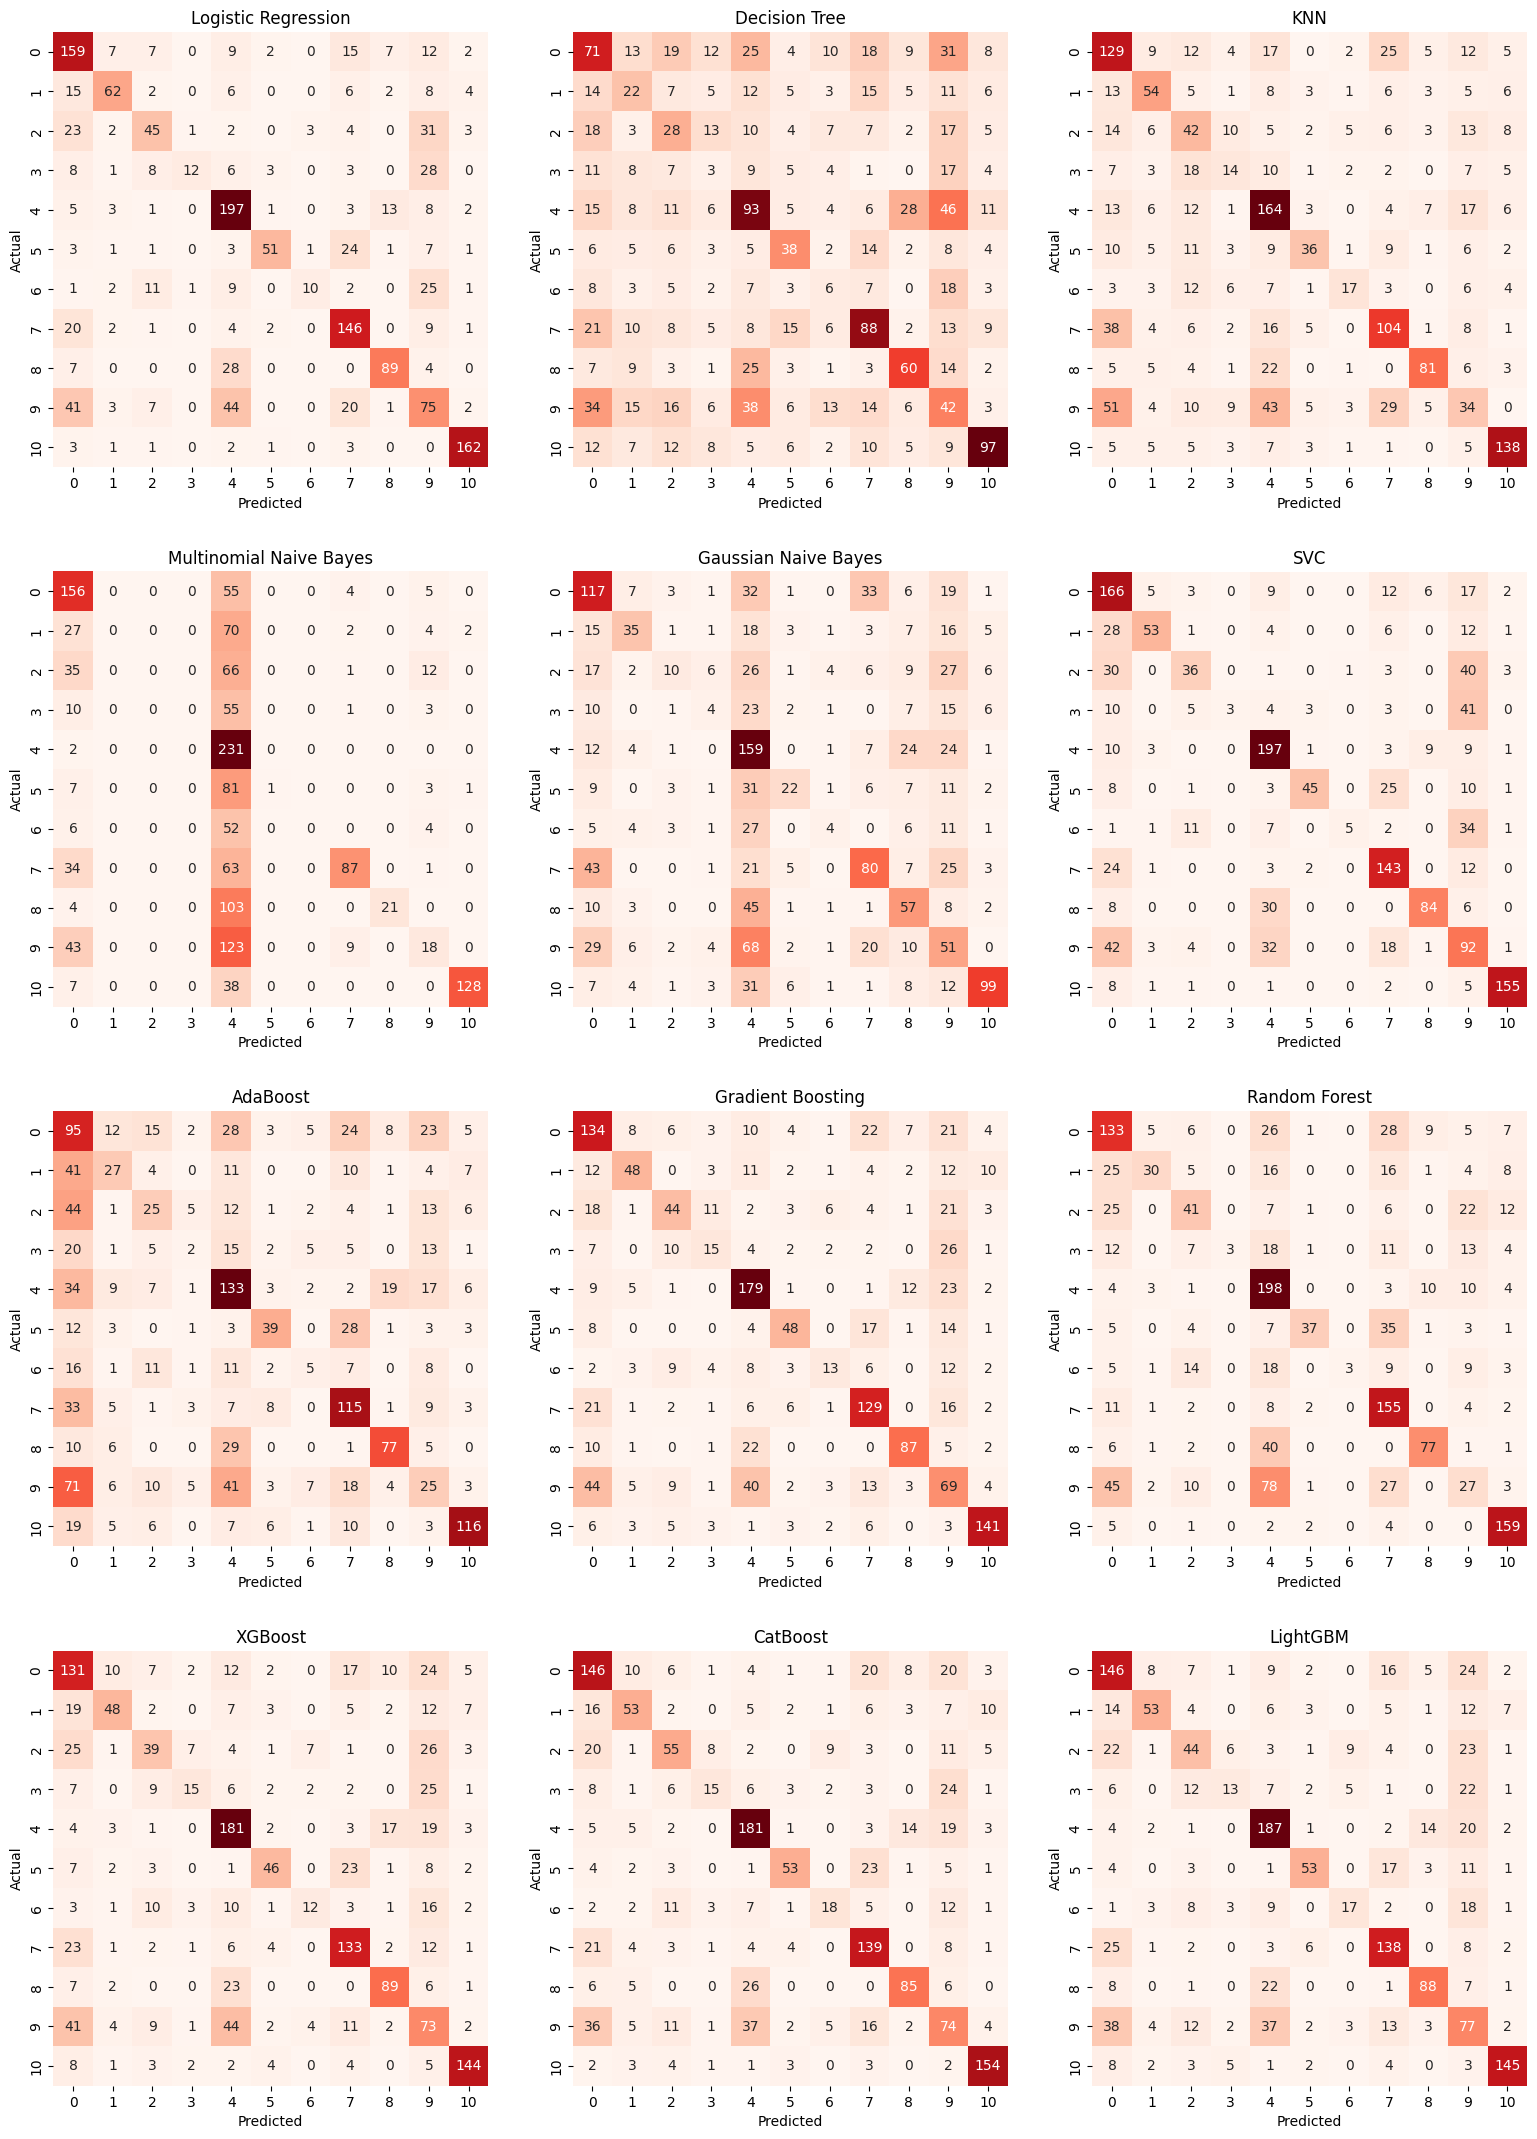

In [10]:
initial_models.Compare_ConfusionMatrices()

In [19]:
initial_performance = initial_models.Compare_Performance()
initial_performance.to_csv('Models/Initial/Unweighted/Performance.csv')
initial_performance

,Name,Accuracy,Precision_0,Precision_1,Precision_2,Precision_3,Precision_4,Precision_5,Precision_6,Precision_7,...,f1-score_1,f1-score_2,f1-score_3,f1-score_4,f1-score_5,f1-score_6,f1-score_7,f1-score_8,f1-score_9,f1-score_10
0,Logistic Regression,0.640,0.558,0.738,0.536,0.857,0.635,0.850,0.714,0.646,...,0.656,0.455,0.289,0.726,0.667,0.263,0.710,0.739,0.375,0.923
1,Decision Tree,0.348,0.327,0.214,0.230,0.047,0.392,0.404,0.103,0.481,...,0.212,0.237,0.045,0.396,0.406,0.100,0.478,0.486,0.200,0.597
2,KNN,0.516,0.448,0.519,0.307,0.259,0.532,0.610,0.515,0.550,...,0.517,0.335,0.228,0.606,0.474,0.358,0.556,0.692,0.218,0.786
3,Multinomial Naive Bayes,0.408,0.471,0.000,0.000,0.000,0.247,1.000,0.000,0.837,...,0.000,0.000,0.000,0.395,0.021,0.000,0.602,0.282,0.148,0.842
4,Gaussian Naive Bayes,0.405,0.427,0.538,0.400,0.182,0.331,0.512,0.267,0.510,...,0.412,0.144,0.088,0.445,0.324,0.104,0.468,0.413,0.248,0.662
5,SVC,0.622,0.496,0.791,0.581,1.000,0.677,0.882,0.833,0.659,...,0.616,0.409,0.083,0.752,0.625,0.147,0.711,0.737,0.391,0.917
6,AdaBoost,0.418,0.241,0.355,0.298,0.100,0.448,0.582,0.185,0.513,...,0.298,0.253,0.045,0.502,0.488,0.112,0.562,0.642,0.158,0.718
7,Gradient Boosting,0.576,0.494,0.640,0.512,0.357,0.624,0.649,0.448,0.632,...,0.533,0.440,0.270,0.688,0.575,0.286,0.663,0.722,0.333,0.817
8,Random Forest,0.548,0.482,0.698,0.441,1.000,0.474,0.822,1.000,0.527,...,0.405,0.396,0.083,0.608,0.536,0.092,0.647,0.681,0.186,0.844
9,XGBoost,0.578,0.476,0.658,0.459,0.484,0.611,0.687,0.480,0.658,...,0.539,0.392,0.300,0.684,0.575,0.276,0.687,0.706,0.348,0.837


In [18]:
import joblib

for key, model in initial_models.get_trained_models().items():
    joblib.dump(model, f"Models/Initial/Unweighted/{key}.pk1")

## Using Class Weights

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(devices='GPU'),
    'LightGBM': LGBMClassifier()
}

In [25]:
weighted_classifiers = Train_Classifiers(x,y,models)

In [26]:
weighted_classifiers.fit()

Training Logistic Regression
Logistic Regression Model Trained
Time taken = 15.305 seconds
------------------
Training Decision Tree
Decision Tree Model Trained
Time taken = 40.428 seconds
------------------
Training KNN
KNN Model Trained
Time taken = 0.006 seconds
------------------
Training Multinomial Naive Bayes
Multinomial Naive Bayes Model Trained
Time taken = 4.211 seconds
------------------
Training Gaussian Naive Bayes
Gaussian Naive Bayes Model Trained
Time taken = 11.397 seconds
------------------
Training SVC
SVC Model Trained
Time taken = 838.758 seconds
------------------
Training AdaBoost
AdaBoost Model Trained
Time taken = 37.825 seconds
------------------
Training Gradient Boosting
Gradient Boosting Model Trained
Time taken = 1627.712 seconds
------------------
Training Random Forest
Random Forest Model Trained
Time taken = 79.339 seconds
------------------
Training XGBoost
XGBoost Model Trained
Time taken = 94.746 seconds
------------------
Training CatBoost
Learning 

In [27]:
weighted_classifiers.score()

Logistic Regression: 0.6406349206349207
Decision Tree: 0.3568253968253968
KNN: 0.5333333333333333
Multinomial Naive Bayes: 0.4006349206349206
Gaussian Naive Bayes: 0.4012698412698413
SVC: 0.633015873015873
AdaBoost: 0.3879365079365079
Gradient Boosting: 0.5784126984126984
Random Forest: 0.5403174603174603
XGBoost: 0.5980952380952381
CatBoost: 0.6165079365079366
LightGBM: 0.6165079365079366


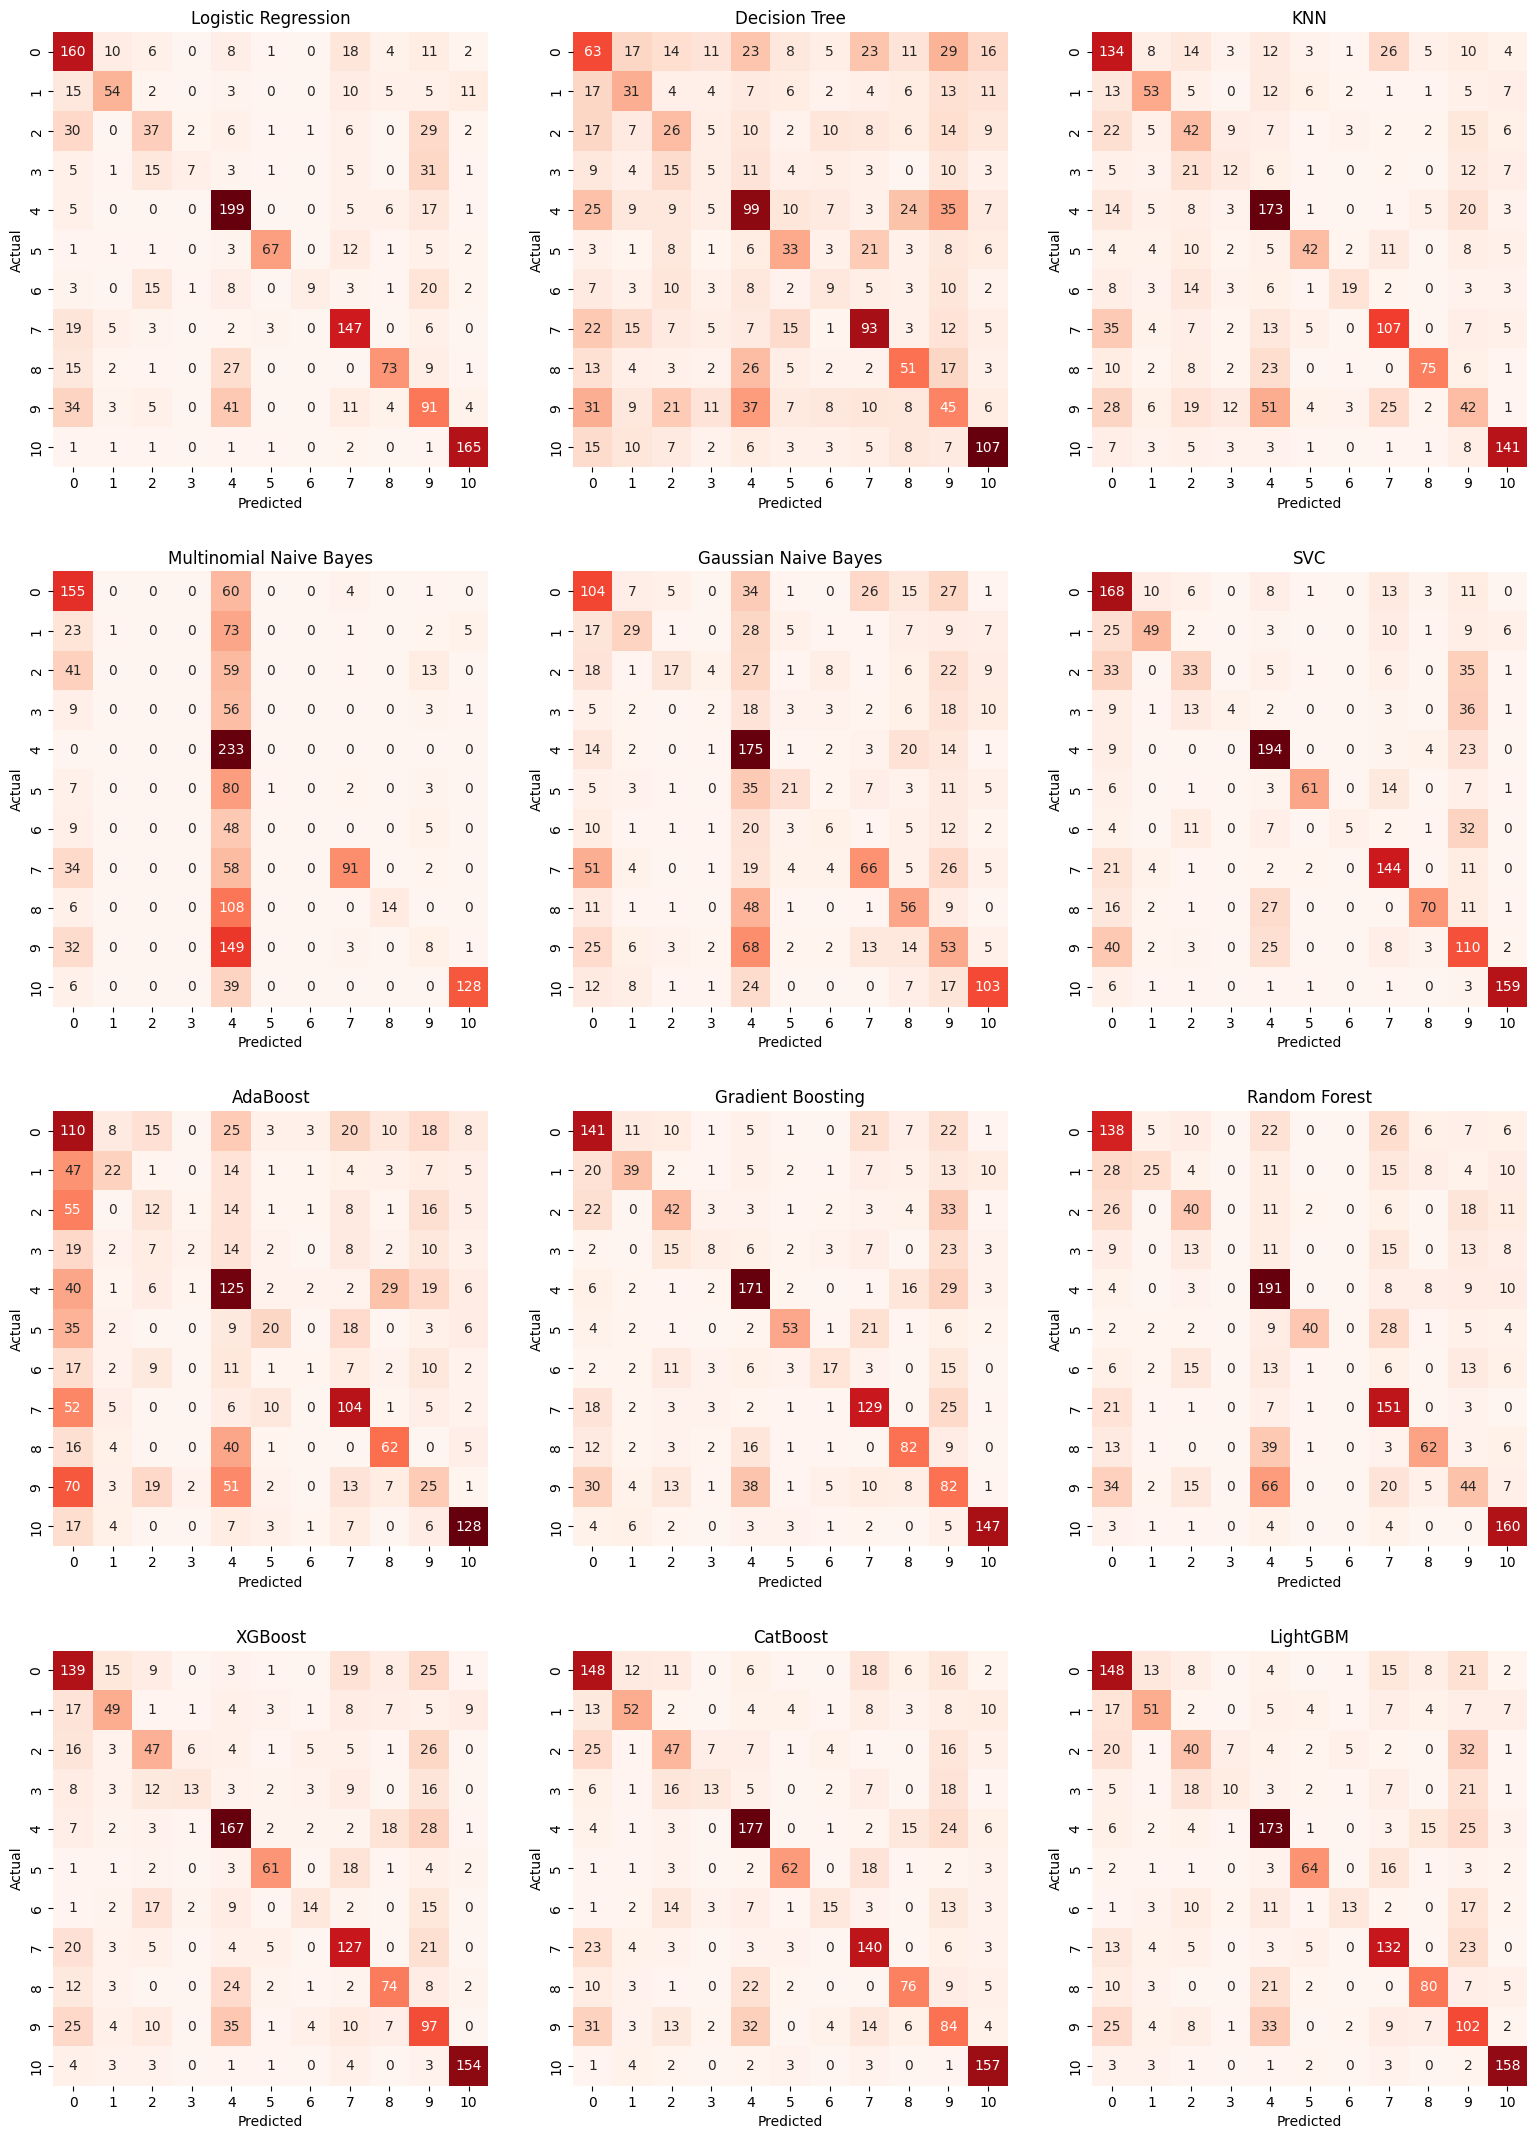

In [28]:
weighted_classifiers.Compare_ConfusionMatrices()